In [ ]:
import pandas as pd

#file_path = '/content/xyz_weather.csv'
#x = pd.read_csv(file_path, header=0)
#Read excel data

import os

file_path = '/content/11_xyz_weather.xlsx'
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

import openpyxl
# or
import xlrd

dataframe1 = pd.read_excel('/content/11_xyz_weather.xlsx', engine='openpyxl')
#or
#dataframe1 = pd.read_excel('/content/11_xyz_weather.xlsx', engine='xlrd')



The file /content/11_xyz_weather.xlsx exists.


In [ ]:
!pip install openpyxl
# or
#!pip install xlrd


In [ ]:
dataframe1.head()

,index,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,...,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,year,month,day_of_week,hour,date,weather
0,0,BROOKLYN,Traffic Control Disregarded,Unspecified,None,None,None,HOYT STREET,2018-10-30 14:30:00,40.683956,...,None,None,None,11201,2018,10,Tuesday,14,2018-10-30,rain
1,1,BROOKLYN,Unspecified,Unspecified,None,None,None,KANE STREET,2018-02-28 17:00:00,40.685450,...,None,None,None,11201,2018,2,Wednesday,17,2018-02-28,rain
2,2,BROOKLYN,Following Too Closely,Unspecified,None,None,None,OTHER,2022-05-24 08:34:00,40.685802,...,None,None,None,11201,2022,5,Tuesday,8,2022-05-24,rain
3,3,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,None,None,None,WYCKOFF STREET,2020-11-10 08:35:00,40.686080,...,None,None,None,11201,2020,11,Tuesday,8,2020-11-10,clear-day
4,4,BROOKLYN,Unsafe Lane Changing,Unspecified,None,None,None,OTHER,2018-07-18 21:10:00,40.686283,...,None,None,None,11201,2018,7,Wednesday,21,2018-07-18,partly-cloudy-day


In [ ]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160512 entries, 0 to 160511
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          160512 non-null  int64         
 1   borough                        160512 non-null  object        
 2   contributing_factor_vehicle_1  160512 non-null  object        
 3   contributing_factor_vehicle_2  160512 non-null  object        
 4   contributing_factor_vehicle_3  160512 non-null  object        
 5   contributing_factor_vehicle_4  160512 non-null  object        
 6   contributing_factor_vehicle_5  160512 non-null  object        
 7   cross_street_name              160512 non-null  object        
 8   timestamp                      160512 non-null  datetime64[ns]
 9   latitude                       160512 non-null  float64       
 10  longitude                      160512 non-null  float64       
 11  

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


#Summary Table on selection
def display_summary(selected_year, selected_month):
    # Filter the DataFrame based on the selected year and month
    filtered_df = dataframe1[(dataframe1['year'] == selected_year) & (dataframe1['month'] == selected_month)]

    # Group by contributing factor and sum the number of people killed and injured
    grouped_df = filtered_df.groupby('contributing_factor_vehicle_1').agg({
        'number_of_cyclist_injured': 'sum',
        'number_of_cyclist_killed': 'sum',
        'number_of_motorist_injured': 'sum',
        'number_of_motorist_killed': 'sum',
        'number_of_pedestrians_injured': 'sum',
        'number_of_pedestrians_killed': 'sum',
        'number_of_persons_injured': 'sum',
        'number_of_persons_killed': 'sum'
    }).reset_index()

    # Display the table
    display(grouped_df)

# dropdowns for year and month
year_dropdown = widgets.Dropdown(options=dataframe1['year'].unique(), description='Year:')
month_dropdown = widgets.Dropdown(options=dataframe1['month'].unique(), description='Month:')

interact(display_summary, selected_year=year_dropdown, selected_month=month_dropdown);


interactive(children=(Dropdown(description='Year:', options=(2018, 2022, 2020, 2021, 2019), value=2018), Dropd…

In [ ]:

# Calculate total persons killed and injured
total_persons_killed = dataframe1['number_of_persons_killed'].sum()
total_persons_injured = dataframe1['number_of_persons_injured'].sum()

print("Total Persons Killed:", total_persons_killed)
print("Total Persons Injured:", total_persons_injured)


Total Persons Killed: 230
Total Persons Injured: 56753


In [ ]:
import pandas as pd



selected_year = int(input("Enter the year to filter on: "))
selected_month = int(input("Enter the month (1-12) to filter on: "))

# Filter the DataFrame based on input
filtered_data = dataframe1[
    (dataframe1['year'] == selected_year) &
    (dataframe1['month'] == selected_month)

]

# Total number of people killed overall for the selected filters
total_people_killed = filtered_data['number_of_persons_killed'].sum()

# Grouping by different categories and calculating total killed for the selected filters
grouped_data = filtered_data.groupby(['weather']).agg({
    'number_of_persons_killed': 'sum',
    'number_of_cyclist_killed': 'sum',
    'number_of_motorist_killed': 'sum'
}).reset_index()

# Renaming the columns for better readability
grouped_data.columns = ['Weather', 'Total Persons Killed', 'Cyclists Killed', 'Motorists Killed']

# Adding a total row
total_row = ['Total', total_people_killed, grouped_data['Cyclists Killed'].sum(), grouped_data['Motorists Killed'].sum()]
grouped_data = grouped_data.append(pd.Series(total_row, index=grouped_data.columns), ignore_index=True)

# Displaying the summary table for the selected filters
print(f"Summary Table for {selected_year} - {selected_month} - Total People Killed:")
print(grouped_data)


Enter the year to filter on: 2015
Enter the month (1-12) to filter on: 5
Summary Table for 2015 - 5 - Total People Killed:
  Weather  Total Persons Killed  Cyclists Killed  Motorists Killed
0   Total                     0                0                 0


<ipython-input-107-0ea17006fd08>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_data = grouped_data.append(pd.Series(total_row, index=grouped_data.columns), ignore_index=True)


In [ ]:
import pandas as pd


# User input for filters
selected_year = int(input("Enter the year to filter on: "))
selected_month = int(input("Enter the month (1-12) to filter on: "))


# Filter the DataFrame
filtered_data = dataframe1[
    (dataframe1['year'] == selected_year) &
    (dataframe1['month'] == selected_month)

]

# Total number of people injured overall for the selected filters
total_people_injured = filtered_data['number_of_persons_injured'].sum()

# Grouping by different categories and calculating total injured for the selected filters
grouped_injured_data = filtered_data.groupby(['weather']).agg({
    'number_of_persons_injured': 'sum',
    'number_of_cyclist_injured': 'sum',
    'number_of_motorist_injured': 'sum'
}).reset_index()

# Renaming the columns for better readability
grouped_injured_data.columns = ['Weather', 'Total Persons Injured', 'Cyclists Injured', 'Motorists Injured']

# Adding a total row
total_injured_row = ['Total', total_people_injured, grouped_injured_data['Cyclists Injured'].sum(), grouped_injured_data['Motorists Injured'].sum()]
grouped_injured_data = grouped_injured_data.append(pd.Series(total_injured_row, index=grouped_injured_data.columns), ignore_index=True)

# Displaying the summary table for the selected filters
print(f"Summary Table for {selected_year} - {selected_month} - Total People Injured:")
print(grouped_injured_data)


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd


# Grouping by weather and calculating the total number of deaths and injuries
weather_fatalities = dataframe1.groupby('weather').agg({
    'number_of_persons_killed': 'sum',
    'number_of_persons_injured': 'sum'
}).reset_index()

# Calculating the total number of accidents for each weather condition
weather_fatalities['Total Accidents'] = dataframe1.groupby('weather')['unique_key'].count().values

# Sorting the DataFrame by the total number of deaths in descending order
weather_fatalities_sorted = weather_fatalities.sort_values(by='number_of_persons_killed', ascending=False)

# Displaying the weather condition with the highest number of deaths
most_fatal_weather = weather_fatalities_sorted.iloc[0]['weather']
total_fatalities_most_fatal_weather = weather_fatalities_sorted.iloc[0]['number_of_persons_killed']

# Sorting the DataFrame by the total number of injuries in descending order
weather_injuries_sorted = weather_fatalities.sort_values(by='number_of_persons_injured', ascending=False)

# Displaying the weather condition with the highest number of injuries
most_injurious_weather = weather_injuries_sorted.iloc[0]['weather']
total_injuries_most_injurious_weather = weather_injuries_sorted.iloc[0]['number_of_persons_injured']

print(f"The weather condition with the highest number of deaths is '{most_fatal_weather}' with a total of {total_fatalities_most_fatal_weather} deaths.")
print(f"The weather condition with the highest number of injuries is '{most_injurious_weather}' with a total of {total_injuries_most_injurious_weather} injuries.")


The weather condition with the highest number of deaths is 'rain' with a total of 110 deaths.
The weather condition with the highest number of injuries is 'rain' with a total of 31425 injuries.


In [ ]:
import pandas as pd



# Yearly accidents
yearly_accidents = dataframe1.groupby('year')['unique_key'].count().reset_index()
yearly_accidents.columns = ['Year', 'Total Accidents']

# Monthly accidents
monthly_accidents = dataframe1.groupby(['year', 'month'])['unique_key'].count().reset_index()
monthly_accidents.columns = ['Year', 'Month', 'Total Accidents']

# Yearly injuries
yearly_injuries = dataframe1.groupby('year')['number_of_persons_injured'].sum().reset_index()
yearly_injuries.columns = ['Year', 'Total Injuries']

# Monthly injuries
monthly_injuries = dataframe1.groupby(['year', 'month'])['number_of_persons_injured'].sum().reset_index()
monthly_injuries.columns = ['Year', 'Month', 'Total Injuries']

# Displaying the results
print("Yearly Accidents:")
print(yearly_accidents)

print("\nMonthly Accidents:")
print(monthly_accidents)

print("\nYearly Injuries:")
print(yearly_injuries)

print("\nMonthly Injuries:")
print(monthly_injuries)


Yearly Accidents:
   Year  Total Accidents
0  2018            46132
1  2019            43351
2  2020            24763
3  2021            24203
4  2022            22063

Monthly Accidents:
    Year  Month  Total Accidents
0   2018      1             3656
1   2018      2             3122
2   2018      3             3859
3   2018      4             3534
4   2018      5             4171
5   2018      6             4164
6   2018      7             4015
7   2018      8             4111
8   2018      9             3764
9   2018     10             4129
10  2018     11             3795
11  2018     12             3812
12  2019      1             3414
13  2019      2             3234
14  2019      3             3612
15  2019      4             3397
16  2019      5             4042
17  2019      6             4059
18  2019      7             3824
19  2019      8             3592
20  2019      9             3696
21  2019     10             3445
22  2019     11             3476
23  2019     12     

In [ ]:
import pandas as pd


# Month with the maximum number of deaths for each year
max_killed_monthly = dataframe1.loc[dataframe1.groupby(['year'])['number_of_persons_killed'].idxmax()]

# Creating a DataFrame to display the results
results_max_killed = pd.DataFrame({
    'Year': max_killed_monthly['year'],
    'Month': max_killed_monthly['month'],
    'Max Deaths': max_killed_monthly['number_of_persons_killed']
})

# Displaying the results
print("Yearly Maximum Deaths:")
print(results_max_killed)


Yearly Maximum Deaths:
        Year  Month  Max Deaths
126801  2018      3           2
73975   2019      6           2
36291   2020      7           3
2439    2021      2           1
2639    2022      2           1


In [ ]:
import pandas as pd


# Month with the maximum number of persons injured for each year
max_injuries_monthly = dataframe1.loc[dataframe1.groupby(['year'])['number_of_persons_injured'].idxmax()]

# Creating a DataFrame to display the results
results_max_injuries = pd.DataFrame({
    'Year': max_injuries_monthly['year'],
    'Month': max_injuries_monthly['month'],
    'Max Injuries': max_injuries_monthly['number_of_persons_injured']
})

# Displaying the results
print("Yearly Maximum Persons Injured:")
print(results_max_injuries)


Yearly Maximum Persons Injured:
        Year  Month  Max Injuries
34602   2018      4            22
105587  2019      6            14
36975   2020      8            15
50249   2021      6            10
9901    2022      5            15


In [ ]:
import pandas as pd

# Finding the index of the row with the maximum number of deaths
max_deaths_index = dataframe1['number_of_persons_killed'].idxmax()

# Extracting the entire row for the accident with the maximum number of deaths
max_deaths_row = dataframe1.loc[max_deaths_index]

# Displaying the entire row
print("Accident with Maximum Deaths:")
print(max_deaths_row)


Accident with Maximum Deaths:
index                                                               36291
borough                                                          BROOKLYN
contributing_factor_vehicle_1                         Driver Inexperience
contributing_factor_vehicle_2                         Driver Inexperience
contributing_factor_vehicle_3                                        None
contributing_factor_vehicle_4                                        None
contributing_factor_vehicle_5                                        None
cross_street_name                                                   OTHER
timestamp                                             2020-07-11 20:18:00
latitude                                                         40.58993
longitude                                                       -73.90059
location                                            (40.58993, -73.90059)
number_of_cyclist_injured                                               0
number_o

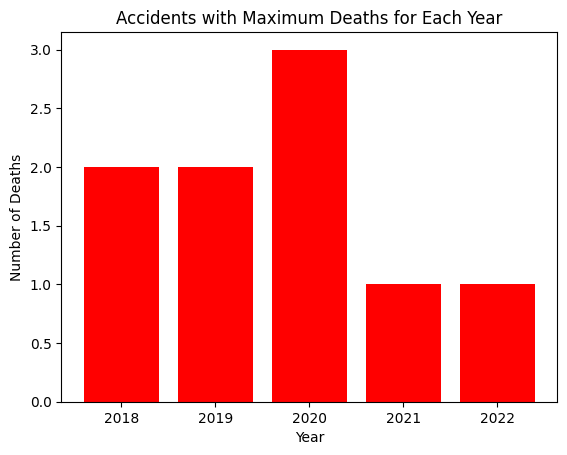

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Finding the index of the row with the maximum number of deaths for each year
max_deaths_indices = dataframe1.groupby('year')['number_of_persons_killed'].idxmax()

# Extracting the entire row for the accident with the maximum number of deaths for each year
max_deaths_rows = dataframe1.loc[max_deaths_indices]

# Bar chart
plt.bar(max_deaths_rows['year'], max_deaths_rows['number_of_persons_killed'], color='red')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Accidents with Maximum Deaths for Each Year')
plt.show()


Contributing Factor with Maximum Injuries:
contributing_factor_vehicle_1    Unspecified
number_of_persons_injured              15014
Name: 50, dtype: object


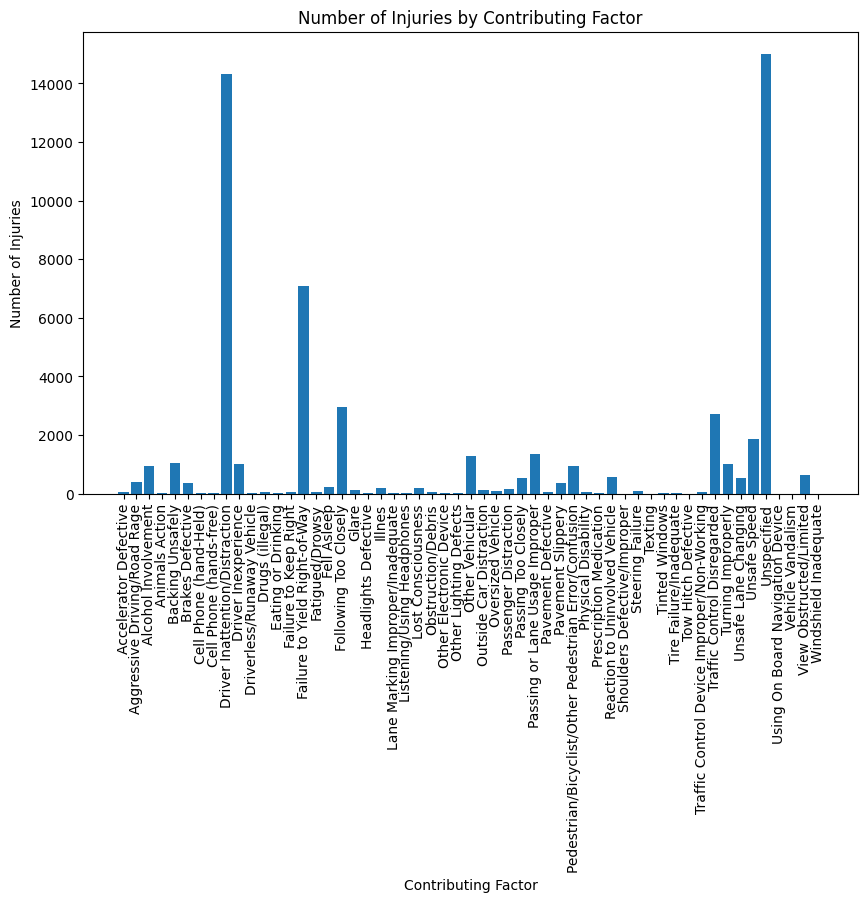

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouping by contributing factor and calculating the total number of injuries
contributing_factor_injuries = dataframe1.groupby('contributing_factor_vehicle_1')['number_of_persons_injured'].sum().reset_index()

# Finding the contributing factor with the maximum number of injuries
max_injuries_contributing_factor = contributing_factor_injuries.loc[contributing_factor_injuries['number_of_persons_injured'].idxmax()]

# Displaying the contributing factor with the maximum number of injuries
print("Contributing Factor with Maximum Injuries:")
print(max_injuries_contributing_factor)

# Creating a bar chart for injuries by contributing factor
plt.figure(figsize=(10, 6))
plt.bar(contributing_factor_injuries['contributing_factor_vehicle_1'], contributing_factor_injuries['number_of_persons_injured'])
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Injuries')
plt.title('Number of Injuries by Contributing Factor')
plt.xticks(rotation=90)
plt.show()


Top 5 Contributing Factors for Injuries:
     contributing_factor_vehicle_1  number_of_persons_injured
50                     Unspecified                      15014
8   Driver Inattention/Distraction                      14321
14   Failure to Yield Right-of-Way                       7083
17           Following Too Closely                       2962
46     Traffic Control Disregarded                       2733


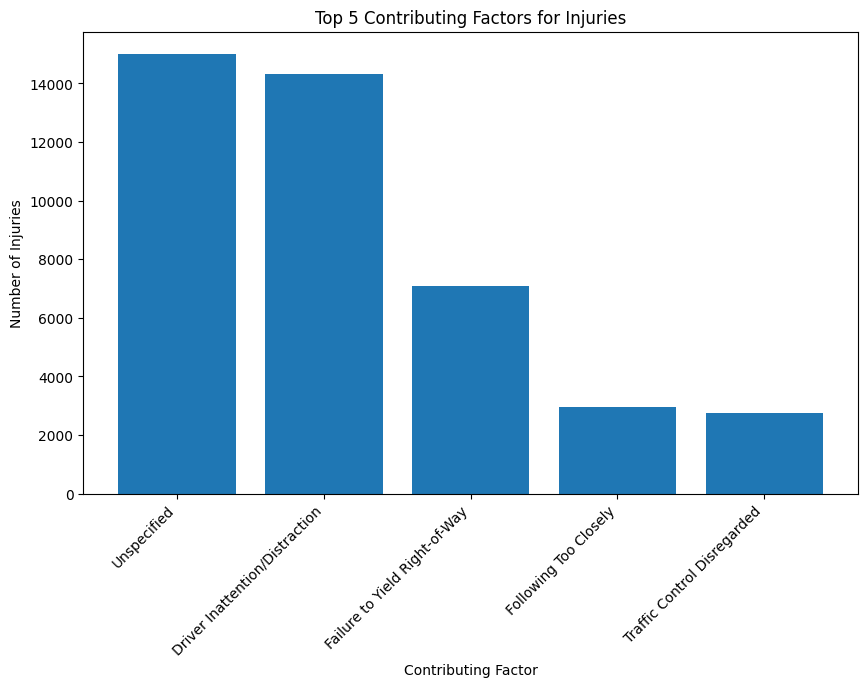

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Grouping by contributing factor and calculating the total number of injuries
contributing_factor_injuries = dataframe1.groupby('contributing_factor_vehicle_1')['number_of_persons_injured'].sum().reset_index()

# Sorting by the number of injuries in descending order
top_injuries_factors = contributing_factor_injuries.sort_values(by='number_of_persons_injured', ascending=False).head(5)

# Displaying the top 5 contributing factors for injuries
print("Top 5 Contributing Factors for Injuries:")
print(top_injuries_factors)

# Creating a bar chart for injuries by contributing factor
plt.figure(figsize=(10, 6))
plt.bar(top_injuries_factors['contributing_factor_vehicle_1'], top_injuries_factors['number_of_persons_injured'])
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Injuries')
plt.title('Top 5 Contributing Factors for Injuries')
plt.xticks(rotation=45, ha='right')
plt.show()


Top 5 Contributing Factors for Deaths:
     contributing_factor_vehicle_1  number_of_persons_killed
50                     Unspecified                        58
14   Failure to Yield Right-of-Way                        36
49                    Unsafe Speed                        29
8   Driver Inattention/Distraction                        28
46     Traffic Control Disregarded                        22


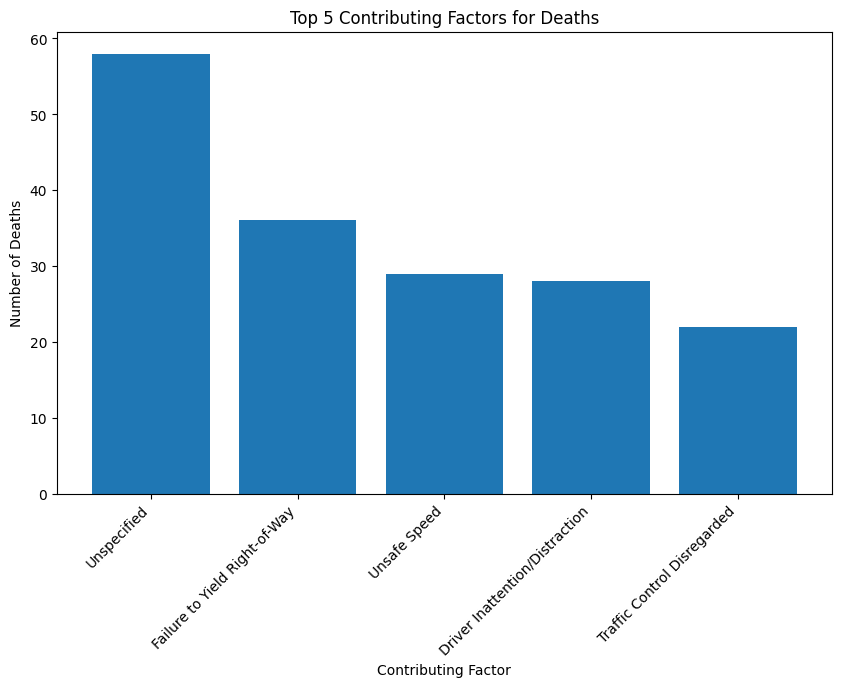

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouping by contributing factor and calculating the total number of deaths
contributing_factor_deaths = dataframe1.groupby('contributing_factor_vehicle_1')['number_of_persons_killed'].sum().reset_index()

# Sorting by the number of deaths in descending order
top_deaths_factors = contributing_factor_deaths.sort_values(by='number_of_persons_killed', ascending=False).head(5)

# Displaying the top 5 contributing factors for deaths
print("Top 5 Contributing Factors for Deaths:")
print(top_deaths_factors)

# Creating a bar chart for deaths by contributing factor
plt.figure(figsize=(10, 6))
plt.bar(top_deaths_factors['contributing_factor_vehicle_1'], top_deaths_factors['number_of_persons_killed'])
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Deaths')
plt.title('Top 5 Contributing Factors for Deaths')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import pandas as pd


# Grouping by year and summing the number of injuries for each category
injuries_by_category = dataframe1.groupby('year')[['number_of_cyclist_injured', 'number_of_motorist_injured', 'number_of_pedestrians_injured']].sum()

# Displaying the results
print("Number of Injuries by Category Each Year:")
print(injuries_by_category)


Number of Injuries by Category Each Year:
      number_of_cyclist_injured  number_of_motorist_injured  \
year                                                          
2018                       1348                        8850   
2019                       1377                        8707   
2020                       1521                        6190   
2021                       1331                        7560   
2022                       1357                        6749   

      number_of_pedestrians_injured  
year                                 
2018                           2611  
2019                           2503  
2020                           1649  
2021                           1731  
2022                           2043  


In [ ]:
import pandas as pd


# Grouping by year and summing the number of deaths for each category
deaths_by_category = dataframe1.groupby('year')[['number_of_cyclist_killed', 'number_of_motorist_killed', 'number_of_pedestrians_killed']].sum()

# Displaying the results
print("Number of Deaths by Category Each Year:")
print(deaths_by_category)


Number of Deaths by Category Each Year:
      number_of_cyclist_killed  number_of_motorist_killed  \
year                                                        
2018                         2                         14   
2019                        13                         12   
2020                         8                         23   
2021                         2                         16   
2022                         4                         12   

      number_of_pedestrians_killed  
year                                
2018                            21  
2019                            30  
2020                            16  
2021                            25  
2022                            22  


In [ ]:
import pandas as pd


# Filter rows where pedestrians were killed
pedestrian_fatalities = dataframe1[dataframe1['number_of_pedestrians_killed'] > 0]

# Extract relevant columns for analysis
columns_of_interest = ['contributing_factor_vehicle_1', 'vehicle_type_code1']
pedestrian_fatalities_data = pedestrian_fatalities[columns_of_interest]

# Displaying the factors affecting pedestrian deaths
print("Factors Affecting Pedestrian Deaths:")
print(pedestrian_fatalities_data)


Factors Affecting Pedestrian Deaths:
         contributing_factor_vehicle_1                   vehicle_type_code1
2439     Failure to Yield Right-of-Way                              Unknown
2639    Driver Inattention/Distraction                                  Bus
2892                       Unspecified                                Sedan
6119       Traffic Control Disregarded  Station Wagon/Sport Utility Vehicle
8356     Failure to Yield Right-of-Way  Station Wagon/Sport Utility Vehicle
...                                ...                                  ...
150601                     Unspecified                            Box Truck
152520                Backing Unsafely                           Backhoe Lo
153439      Driverless/Runaway Vehicle  Station Wagon/Sport Utility Vehicle
155301                     Unspecified                              Unknown
159158     Traffic Control Disregarded                                Sedan

[113 rows x 2 columns]


In [ ]:
import pandas as pd



# Filter rows where pedestrians were killed
pedestrian_fatalities = dataframe1[dataframe1['number_of_pedestrians_killed'] > 0]

# Extract relevant columns for analysis
columns_of_interest = ['contributing_factor_vehicle_1', 'vehicle_type_code1']
pedestrian_fatalities_data = pedestrian_fatalities[columns_of_interest]

# Grouping by contributing factors and vehicle types and counting occurrences
pedestrian_fatalities_summary = pedestrian_fatalities_data.groupby(['contributing_factor_vehicle_1', 'vehicle_type_code1']).size().reset_index(name='count')

# Sorting by the count in descending order
pedestrian_fatalities_summary_sorted = pedestrian_fatalities_summary.sort_values(by='count', ascending=False)

# Displaying the summary
print("Top Factors Affecting Pedestrian Deaths:")
print(pedestrian_fatalities_summary_sorted)



Top Factors Affecting Pedestrian Deaths:
                        contributing_factor_vehicle_1  \
39                                        Unspecified   
18                      Failure to Yield Right-of-Way   
38                                        Unspecified   
8                      Driver Inattention/Distraction   
28                        Traffic Control Disregarded   
34                                        Unspecified   
32                                       Unsafe Speed   
17                      Failure to Yield Right-of-Way   
14                      Failure to Yield Right-of-Way   
7                      Driver Inattention/Distraction   
11                                Driver Inexperience   
27                        Traffic Control Disregarded   
13                      Failure to Yield Right-of-Way   
15                      Failure to Yield Right-of-Way   
16                      Failure to Yield Right-of-Way   
5                      Driver Inattention/Distr

In [ ]:
import pandas as pd

# Create a new column with sorted combinations of vehicle types
dataframe1['sorted_combination'] = dataframe1[['vehicle_type_code1', 'vehicle_type_code2']].apply(lambda x: '-'.join(sorted(x)), axis=1)

# Group by the sorted combinations and count occurrences
combination_counts = dataframe1.groupby('sorted_combination').size().reset_index(name='count')

# Sort the counts in descending order
combination_counts_sorted = combination_counts.sort_values(by='count', ascending=False)

# Display the top 10 combinations
top_10_combinations = combination_counts_sorted.head(10)
print("Top 10 Vehicle Type Combinations and Occurrence Counts:")
print(top_10_combinations)

# Drop the temporary column
dataframe1.drop('sorted_combination', axis=1, inplace=True)



TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
import pandas as pd

top_n = 50

# Grouping by vehicle type code 1 and summing the number of persons injured
injuries_by_vehicle_type1 = dataframe1.groupby('vehicle_type_code1')['number_of_persons_injured'].sum().reset_index()

# Sorting by the total number of persons injured in descending order
injuries_by_vehicle_type1_sorted = injuries_by_vehicle_type1.sort_values(by='number_of_persons_injured', ascending=False)

# Displaying the top N values
top_values = injuries_by_vehicle_type1_sorted.head(top_n)
print("Top {} Vehicle Type Code 1 for Persons Injured:".format(top_n))
print(top_values)


Top 50 Vehicle Type Code 1 for Persons Injured:
                      vehicle_type_code1  number_of_persons_injured
279                                Sedan                      27016
289  Station Wagon/Sport Utility Vehicle                      19727
35                                  Bike                       1905
308                                 Taxi                       1581
234                        Pick-up Truck                       1053
40                                   Bus                        914
341                              Unknown                        826
193                           Motorcycle                        605
37                             Box Truck                        528
88                                E-Bike                        487
90                             E-Scooter                        304
347                                  Van                        284
189                                Moped                        162


In [ ]:
import pandas as pd



# 1. Overall Distribution of Vehicle Types - Max Count
vehicle_distribution_max = dataframe1['vehicle_type_code1'].value_counts().idxmax()

# 2. Vehicle Type vs. Fatalities and Injuries - Max Count
max_fatalities_vehicle = dataframe1.groupby('vehicle_type_code1')['number_of_persons_killed'].sum().idxmax()
max_injuries_vehicle = dataframe1.groupby('vehicle_type_code1')['number_of_persons_injured'].sum().idxmax()

# 3. Vehicle Type Trends Over Time - Max Count
max_trend_vehicle = dataframe1.groupby(['year', 'vehicle_type_code1']).size().unstack().idxmax().idxmax()

# 4. Vehicle Type and Weather Conditions - Max Count
max_weather_vehicle = pd.crosstab(dataframe1['vehicle_type_code1'], dataframe1['weather']).sum(axis=1).idxmax()

# 5. Vehicle Type and Day of the Week - Max Count
max_day_vehicle = pd.crosstab(dataframe1['vehicle_type_code1'], dataframe1['day_of_week']).sum(axis=1).idxmax()

# 6. Vehicle Type and Time of Day - Max Count
max_hour_vehicle = pd.crosstab(dataframe1['vehicle_type_code1'], dataframe1['hour']).sum(axis=1).idxmax()

# 7. Most Dangerous Intersections for Each Vehicle Type - Max Count
#most_dangerous_intersections_max = (dataframe1.groupby(['vehicle_type_code1', 'cross_street_name'])
 #                                    ['cross_street_name'].count().idxmax(level=0))


# 8. Contributing Factors by Vehicle Type - Max Count
max_contributing_factor_vehicle = pd.crosstab(dataframe1['vehicle_type_code1'], dataframe1['contributing_factor_vehicle_1']).sum(axis=1).idxmax()

# 9. Summary of Top Vehicle Types by Incidents - Max Count
top_vehicle_types_max = dataframe1['vehicle_type_code1'].value_counts().idxmax()

# Displaying results
print("1. Overall Distribution of Vehicle Types - Max Count:", vehicle_distribution_max)
print("2. Vehicle Type vs. Fatalities and Injuries - Max Count:")
print("   - Max Fatalities Vehicle Type:", max_fatalities_vehicle)
print("   - Max Injuries Vehicle Type:", max_injuries_vehicle)
print("3. Vehicle Type Trends Over Time - Max Count:", max_trend_vehicle)
print("4. Vehicle Type and Weather Conditions - Max Count:", max_weather_vehicle)
print("5. Vehicle Type and Day of the Week - Max Count:", max_day_vehicle)
print("6. Vehicle Type and Time of Day - Max Count:", max_hour_vehicle)
#rint("7. Most Dangerous Intersections for Each Vehicle Type - Max Count:")
#print(most_dangerous_intersections_max)
print("8. Contributing Factors by Vehicle Type - Max Count:", max_contributing_factor_vehicle)
print("9. Summary of Top Vehicle Types by Incidents - Max Count:", top_vehicle_types_max)


1. Overall Distribution of Vehicle Types - Max Count: Sedan
2. Vehicle Type vs. Fatalities and Injuries - Max Count:
   - Max Fatalities Vehicle Type: Station Wagon/Sport Utility Vehicle
   - Max Injuries Vehicle Type: Sedan
3. Vehicle Type Trends Over Time - Max Count: 7
4. Vehicle Type and Weather Conditions - Max Count: Sedan
5. Vehicle Type and Day of the Week - Max Count: Sedan
6. Vehicle Type and Time of Day - Max Count: Sedan
8. Contributing Factors by Vehicle Type - Max Count: Sedan
9. Summary of Top Vehicle Types by Incidents - Max Count: Sedan


In [ ]:
import pandas as pd



# 2. Vehicle Type vs. Injuries and Fatalities - Max Count
max_count_vehicle_type = dataframe1.groupby('vehicle_type_code1').apply(lambda x: x['number_of_persons_injured'].sum() + x['number_of_persons_killed'].sum()).idxmax()
max_injuries_count = dataframe1[dataframe1['vehicle_type_code1'] == max_count_vehicle_type]['number_of_persons_injured'].sum()
max_fatalities_count = dataframe1[dataframe1['vehicle_type_code1'] == max_count_vehicle_type]['number_of_persons_killed'].sum()

# Displaying results
print(" Vehicle Type vs. Injuries and Fatalities - Max Count:")
print("   - Max Count Vehicle Type:", max_count_vehicle_type)
print("   - Exact Number of Injuries:", max_injuries_count)
print("   - Exact Number of Fatalities:", max_fatalities_count)


 Vehicle Type vs. Injuries and Fatalities - Max Count:
   - Max Count Vehicle Type: Sedan
   - Exact Number of Injuries: 27016
   - Exact Number of Fatalities: 63


In [ ]:
import pandas as pd



# 2. Vehicle Type vs. Fatalities - Max Count
max_fatalities_vehicle_type = dataframe1.groupby('vehicle_type_code1')['number_of_persons_killed'].sum().idxmax()
max_fatalities_count = dataframe1[dataframe1['vehicle_type_code1'] == max_fatalities_vehicle_type]['number_of_persons_killed'].sum()

# Displaying results
print("Vehicle Type vs. Fatalities - Max Count:")
print("   - Max Fatalities Vehicle Type:", max_fatalities_vehicle_type)
print("   - Exact Number of Fatalities:", max_fatalities_count)


Vehicle Type vs. Fatalities - Max Count:
   - Max Fatalities Vehicle Type: Station Wagon/Sport Utility Vehicle
   - Exact Number of Fatalities: 78


In [ ]:
import pandas as pd

# 4. Day-Night Analysis - Total Injuries and Fatalities
day_night_analysis = dataframe1.groupby('hour').agg({
    'number_of_persons_injured': 'sum',
    'number_of_persons_killed': 'sum'
}).reset_index()

# Displaying results
print("4. Day-Night Analysis - Total Injuries and Fatalities:")
print(day_night_analysis)


4. Day-Night Analysis - Total Injuries and Fatalities:
    hour  number_of_persons_injured  number_of_persons_killed
0      0                       2429                        16
1      1                       1095                         5
2      2                        894                         6
3      3                        753                         5
4      4                        693                         4
5      5                        738                         8
6      6                       1074                        13
7      7                       1636                         6
8      8                       2458                         7
9      9                       2109                         5
10    10                       2078                        14
11    11                       2266                         6
12    12                       2610                        11
13    13                       2815                        10
14    14       

In [ ]:
import pandas as pd



# Adding a new column 'day_night' based on the 'hour' column
dataframe1['day_night'] = dataframe1['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Total Injuries and Fatalities in Day and Night
total_day_night_analysis = dataframe1.groupby('day_night').agg({
    'number_of_persons_injured': 'sum',
    'number_of_persons_killed': 'sum'
}).reset_index()

# Displaying results
print("Total Injuries and Fatalities in Day and Night:")
print(total_day_night_analysis)


5. Total Injuries and Fatalities in Day and Night:
  day_night  number_of_persons_injured  number_of_persons_killed
0       Day                      32466                       114
1     Night                      24287                       116


In [ ]:
import pandas as pd


# Deaths for Each Category
deaths_by_category = dataframe1[['number_of_cyclist_killed', 'number_of_pedestrians_killed', 'number_of_motorist_killed']].sum()

# Displaying results
print("Deaths for Each Category:")
print(deaths_by_category)


Deaths for Each Category:
number_of_cyclist_killed         29
number_of_pedestrians_killed    114
number_of_motorist_killed        77
dtype: int64


In [ ]:
import pandas as pd


# Deaths for Each Category
deaths_by_category = dataframe1[['number_of_cyclist_injured', 'number_of_pedestrians_injured', 'number_of_motorist_injured']].sum()

# Displaying results
print("Injuries for Each Category:")
print(deaths_by_category)

Injuries for Each Category:
number_of_cyclist_injured         6934
number_of_pedestrians_injured    10537
number_of_motorist_injured       38056
dtype: int64


In [ ]:
import pandas as pd



# Adding a new column 'day_night' based on the 'hour' column
dataframe1['day_night'] = dataframe1['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

#  Deaths for Each Category in Day and Night
deaths_by_category_day_night = dataframe1.groupby(['day_night'])[['number_of_cyclist_killed', 'number_of_pedestrians_killed', 'number_of_motorist_killed']].sum()

# Displaying results
print("Deaths for Each Category in Day and Night:")
print(deaths_by_category_day_night)


Deaths for Each Category in Day and Night:
           number_of_cyclist_killed  number_of_pedestrians_killed  \
day_night                                                           
Day                              14                            62   
Night                            15                            52   

           number_of_motorist_killed  
day_night                             
Day                               32  
Night                             45  


In [ ]:
import pandas as pd

# Adding a new column 'day_night' based on the 'hour' column
dataframe1['day_night'] = dataframe1['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# 7. Deaths for Each Category in Day and Night
deaths_by_category_day_night = dataframe1.groupby(['day_night'])[['number_of_cyclist_killed', 'number_of_pedestrians_killed', 'number_of_motorist_killed']].sum()

# Displaying results
print("7. Deaths for Each Category in Day and Night:")
print(deaths_by_category_day_night)


7. Deaths for Each Category in Day and Night:
           number_of_cyclist_killed  number_of_pedestrians_killed  \
day_night                                                           
Day                              14                            62   
Night                            15                            52   

           number_of_motorist_killed  
day_night                             
Day                               32  
Night                             45  


In [ ]:
import pandas as pd


# Eliminating leading and trailing white spaces from 'street_name'
dataframe1['on_street_name'] = dataframe1['on_street_name'].str.strip()

# 8. Total Injuries and Fatalities by Street
injuries_fatalities_by_street = dataframe1.groupby('on_street_name').agg({
    'number_of_persons_injured': 'sum',
    'number_of_persons_killed': 'sum'
}).reset_index()

# Displaying results
print("8. Total Injuries and Fatalities by Street:")
print(injuries_fatalities_by_street)

# 9. Top 3 Streets with Maximum Fatalities
top_3_fatalities_streets = injuries_fatalities_by_street.nlargest(5, 'number_of_persons_killed')
print("\n9. Top 3 Streets with Maximum Fatalities:")
print(top_3_fatalities_streets)

# 10. Top 3 Streets with Maximum Injuries
top_3_injuries_streets = injuries_fatalities_by_street.nlargest(5, 'number_of_persons_injured')
print("\n10. Top 3 Streets with Maximum Injuries:")
print(top_3_injuries_streets)


8. Total Injuries and Fatalities by Street:
      on_street_name  number_of_persons_injured  number_of_persons_killed
0           1 AVENUE                          6                         0
1            1 PLACE                          3                         0
2           1 STREET                          2                         0
3          10 AVENUE                         73                         0
4          10 STREET                          6                         0
...              ...                        ...                       ...
1334  WYCKOFF STREET                          4                         0
1335    WYONA STREET                         25                         0
1336    WYTHE AVENUE                        130                         0
1337     WYTHE PLACE                          0                         0
1338     YORK STREET                          9                         0

[1339 rows x 3 columns]

9. Top 3 Streets with Maximum Fatalities:


In [ ]:
import pandas as pd


# 8. Total Injuries and Fatalities by Street
injuries_fatalities_by_street = dataframe1.groupby('street_name').agg({
    'number_of_persons_injured': 'sum',
    'number_of_persons_killed': 'sum'
}).reset_index()

# Displaying results
print("8. Total Injuries and Fatalities by Street:")
print(injuries_fatalities_by_street)

# 9. Top 3 Streets with Maximum Fatalities
top_3_fatalities_streets = injuries_fatalities_by_street.nlargest(3, 'number_of_persons_killed')
print("\n9. Top 3 Streets with Maximum Fatalities:")
print(top_3_fatalities_streets)

# 10. Top 3 Streets with Maximum Injuries
top_3_injuries_streets = injuries_fatalities_by_street.nlargest(3, 'number_of_persons_injured')
print("\n10. Top 3 Streets with Maximum Injuries:")
print(top_3_injuries_streets)


8. Total Injuries and Fatalities by Street:
                           street_name  number_of_persons_injured  \
0                               AVENUE                       1015   
1         AVENUE                                                1   
2        AVENUE                                               760   
3       AVENUE                                               1135   
4                                DRIVE                          0   
...                                ...                        ...   
1727                      WYTHE AVENUE                         54   
1728  WYTHE AVENUE                                             76   
1729  WYTHE PLACE                                               0   
1730                       YORK STREET                          4   
1731  YORK STREET                                               5   

      number_of_persons_killed  
0                            8  
1                            0  
2                           

In [ ]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160512 entries, 0 to 160511
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          160512 non-null  int64         
 1   borough                        160512 non-null  object        
 2   contributing_factor_vehicle_1  160512 non-null  object        
 3   contributing_factor_vehicle_2  160512 non-null  object        
 4   contributing_factor_vehicle_3  160512 non-null  object        
 5   contributing_factor_vehicle_4  160512 non-null  object        
 6   contributing_factor_vehicle_5  160512 non-null  object        
 7   cross_street_name              160512 non-null  object        
 8   timestamp                      160512 non-null  datetime64[ns]
 9   latitude                       160512 non-null  float64       
 10  longitude                      160512 non-null  float64       
 11  

In [ ]:
import pandas as pd

# Zip Code with Maximum Accidents, Deaths, and Injuries
max_accidents_zip = dataframe1.groupby('zip_code')['unique_key'].count().idxmax()
max_deaths_zip = dataframe1.groupby('zip_code')['number_of_persons_killed'].sum().idxmax()
max_injuries_zip = dataframe1.groupby('zip_code')['number_of_persons_injured'].sum().idxmax()

# Displaying results
print("11. Zip Code with Maximum Accidents, Deaths, and Injuries:")
print("   - Max Accidents Zip Code:", max_accidents_zip)
print("   - Max Deaths Zip Code:", max_deaths_zip)
print("   - Max Injuries Zip Code:", max_injuries_zip)


11. Zip Code with Maximum Accidents, Deaths, and Injuries:
   - Max Accidents Zip Code: 11207
   - Max Deaths Zip Code: 11234
   - Max Injuries Zip Code: 11207


In [ ]:
import pandas as pd


# Top 5 Zip Codes with Maximum Deaths
top_5_deaths_zip = dataframe1.groupby('zip_code')['number_of_persons_killed'].sum().nlargest(5).reset_index()

# Top 5 Zip Codes with Maximum Injuries
top_5_injuries_zip = dataframe1.groupby('zip_code')['number_of_persons_injured'].sum().nlargest(5).reset_index()

# Displaying results
print("12. Top 5 Zip Codes with Maximum Deaths:")
print(top_5_deaths_zip)

print("\n13. Top 5 Zip Codes with Maximum Injuries:")
print(top_5_injuries_zip)



12. Top 5 Zip Codes with Maximum Deaths:
   zip_code  number_of_persons_killed
0     11234                        19
1     11207                        18
2     11236                        18
3     11206                        11
4     11208                        10

13. Top 5 Zip Codes with Maximum Injuries:
   zip_code  number_of_persons_injured
0     11207                       4274
1     11236                       3702
2     11203                       3072
3     11212                       3033
4     11234                       2800


In [ ]:
import pandas as pd



# Create a new column with sorted combinations of contributing factors (ignoring "Unspecified")
dataframe1['sorted_contrib_factor'] = dataframe1.apply(lambda row: '-'.join(sorted(filter(lambda x: x != 'Unspecified', [row['contributing_factor_vehicle_1'], row['contributing_factor_vehicle_2']]))), axis=1)

# Drop rows where "Unspecified" is present in either contributing factor column
dataframe1 = dataframe1[(dataframe1['contributing_factor_vehicle_1'] != 'Unspecified') & (dataframe1['contributing_factor_vehicle_2'] != 'Unspecified')]

# Group by the sorted combinations and count occurrences
contrib_factor_counts = dataframe1.groupby('sorted_contrib_factor').size().reset_index(name='count')

# Sort the counts in descending order
contrib_factor_counts_sorted = contrib_factor_counts.sort_values(by='count', ascending=False)

# Display the top 10 combinations
top_10_contrib_factor_combinations = contrib_factor_counts_sorted.head(10)
print("Top 10 Contributing Factor Combinations and Occurrence Counts (Ignoring 'Unspecified'):")
print(top_10_contrib_factor_combinations)

# Drop the temporary column if not needed
dataframe1.drop('sorted_contrib_factor', axis=1, inplace=True)



Top 10 Contributing Factor Combinations and Occurrence Counts (Ignoring 'Unspecified'):
                                 sorted_contrib_factor  count
101  Driver Inattention/Distraction-Driver Inattent...   4702
285                    Other Vehicular-Other Vehicular    953
117     Driver Inattention/Distraction-Other Vehicular    604
350  Passing or Lane Usage Improper-Passing or Lane...    465
107  Driver Inattention/Distraction-Failure to Yiel...    430
189  Failure to Yield Right-of-Way-Failure to Yield...    382
122  Driver Inattention/Distraction-Passing or Lane...    332
395  Traffic Control Disregarded-Traffic Control Di...    308
209         Failure to Yield Right-of-Way-Unsafe Speed    305
339            Passing Too Closely-Passing Too Closely    283


In [ ]:
import pandas as pd


# 14. Contributing Factor with Maximum Accidents, Deaths, and Injuries
max_accidents_factor = dataframe1.groupby('contributing_factor_vehicle_1')['unique_key'].count().idxmax()
max_deaths_factor = dataframe1.groupby('contributing_factor_vehicle_1')['number_of_persons_killed'].sum().idxmax()
max_injuries_factor = dataframe1.groupby('contributing_factor_vehicle_1')['number_of_persons_injured'].sum().idxmax()

# Displaying results
print("14. Contributing Factor with Maximum Accidents, Deaths, and Injuries:")
print("   - Max Accidents Contributing Factor:", max_accidents_factor)
print("   - Max Deaths Contributing Factor:", max_deaths_factor)
print("   - Max Injuries Contributing Factor:", max_injuries_factor)


14. Contributing Factor with Maximum Accidents, Deaths, and Injuries:
   - Max Accidents Contributing Factor: Driver Inattention/Distraction
   - Max Deaths Contributing Factor: Driver Inattention/Distraction
   - Max Injuries Contributing Factor: Driver Inattention/Distraction


In [ ]:
import pandas as pd

# Create a summary table for deaths and injuries by contributing factor 1
contrib_factor_summary = dataframe1.groupby('contributing_factor_vehicle_1').agg(
    total_deaths=pd.NamedAgg(column='number_of_persons_killed', aggfunc='sum'),
    total_injuries=pd.NamedAgg(column='number_of_persons_injured', aggfunc='sum')
).reset_index()

# Sort the summary table by total deaths in descending order
contrib_factor_summary_sorted = contrib_factor_summary.sort_values(by='total_deaths', ascending=False)

# Display the summary table
print("Summary Table: Deaths and Injuries by Contributing Factor 1")
print(contrib_factor_summary_sorted)

# Additional Analysis: Top 5 Contributing Factors for Deaths and Injuries
top_5_factors_deaths = contrib_factor_summary_sorted.head(5)['contributing_factor_vehicle_1'].tolist()
top_5_factors_injuries = contrib_factor_summary_sorted.head(5)['contributing_factor_vehicle_1'].tolist()

print("\nAdditional Analysis:")
print("Top 5 Contributing Factors for Deaths:", top_5_factors_deaths)
print("Top 5 Contributing Factors for Injuries:", top_5_factors_injuries)


Summary Table: Deaths and Injuries by Contributing Factor 1
                        contributing_factor_vehicle_1  total_deaths  \
7                      Driver Inattention/Distraction             5   
45                                       Unsafe Speed             4   
8                                 Driver Inexperience             3   
13                      Failure to Yield Right-of-Way             2   
47                            View Obstructed/Limited             1   
43                                 Turning Improperly             1   
42                        Traffic Control Disregarded             1   
34                     Reaction to Uninvolved Vehicle             1   
35                       Shoulders Defective/Improper             0   
28                                Passing Too Closely             0   
29                     Passing or Lane Usage Improper             0   
30                                 Pavement Defective             0   
31               